In [5]:
import numpy as np
from matplotlib import pyplot as plt
X = np.vstack([np.linspace(-3,3,9).reshape(-1,1) + np.array([0, 1]),
               np.linspace(-3,3,9).reshape(-1,1) + np.array([0,-1])])
y = np.hstack((np.ones(9), -np.ones(9)))

In [2]:
# Logistic regression minus-log-likelihood and its gradient
def L(theta, X,y):
    return np.sum(np.log(1+np.exp(-y*(X@theta))))

def gL(theta, X,y):
    return np.sum(-y.reshape(-1,1) * X / np.reshape(1+np.exp(y*(X@theta)), (-1,1)), axis=0)

In [7]:
def sgd(L, gL, X,y, theta0, t0=1, epochs=100):
    theta = theta0
    Thetas = []
    Losses = []
    for tau in range(epochs):
        for xi,yi in zip(X,y):  # TODO: shuffle
            vk = gL(theta, xi, yi)
            Losses.append(L(theta, X, y))
            tk = t0/(tau+1)
            theta = theta - tk * vk
            Thetas.append(theta)
    plt.semilogy(Losses, '.-')
    plt.xlabel('iteration')
    plt.title('minus-log-likelihood')
    plt.show()
    return theta, np.array(Thetas)

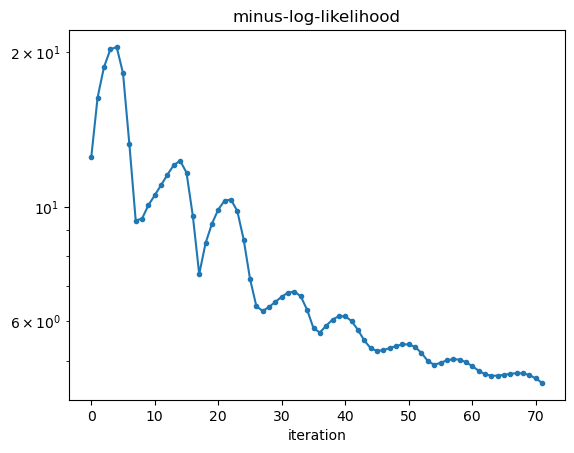

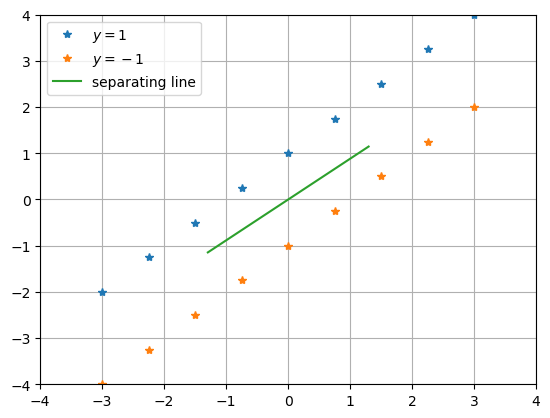

gL(theta_star) = 2.8076601968278267


In [11]:
theta_star, _ = sgd(L,gL, X,y, np.zeros(2), t0=1/5, epochs=4)

plt.plot(X[y==1,0], X[y==1,1], '*')
plt.plot(X[y==-1,0], X[y==-1,1], '*')
plt.plot(np.array([-1,1])*theta_star[1], -np.array([-1,1])*theta_star[0])
plt.legend(['$y=1$', '$y=-1$', 'separating line'])
plt.grid()
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

print(f"gL(theta_star) = {np.linalg.norm(gL(theta_star,X,y))}")